<a href="https://colab.research.google.com/github/AfifahChairunnisa/coba/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Afifah Chairunnisa Hariyawan
- **Email:** afifah.chairunnisa.h@gmail.com
- **ID Dicoding:** afifahhach

## Menentukan Pertanyaan Bisnis

- Apakah produk paling laris yang terjual dari waktu ke waktu?
- Bagaimana tren pendapatan platform?



## Import Semua Packages/Library yang Digunakan

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
!unzip -q E-commerce-public-dataset.zip

In [ ]:
customers_df = pd.read_csv('/content/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation_df = pd.read_csv('/content/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
order_items_df = pd.read_csv('/content/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments_df = pd.read_csv('/content/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews_df = pd.read_csv('/content/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orders_df = pd.read_csv('/content/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
product_category_name_df = pd.read_csv('/content/E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
products_df = pd.read_csv('/content/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers_df = pd.read_csv('/content/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Mengimpor dataset menggunakan zip file dan melakukan unzip pada query.
- Mengumpulkan dataset pelanggan yang mencakup atribut seperti data customer, geolocation, order, product, dan seller.

### Assessing Data

**Menilai tabel customers_df**

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
customers_df.duplicated().sum()

0

In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Menilai tabel geolocation_df**

In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [ ]:
geolocation_df.duplicated().sum()

261831

In [ ]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Menilai tabel order_items_df**

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
order_items_df.duplicated().sum()

0

In [ ]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Menilai tabel order_payments_df**

In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
order_payments_df.duplicated().sum()

0

In [ ]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Menilai tabel order_reviews_df**

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
order_reviews_df.duplicated().sum()

0

In [ ]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Menilai tabel orders_df**

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
 orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
orders_df.duplicated().sum()

0

In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Menilai tabel product_category_name_df**

In [ ]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
product_category_name_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [ ]:
product_category_name_df.duplicated().sum()

0

In [ ]:
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Menilai tabel products_df**

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df.duplicated().sum()

0

In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Menilai tabel sellers_df**

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [ ]:
sellers_df.duplicated().sum()

0

In [ ]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Terdapat missing value pada kolom order_reviews_df, order_df, dan products_df
- Terdapat data duplikat pada kolom geolocation_df

###Cleaning Data

**Membersihkan tabel order_reviews_df**

In [ ]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [ ]:
#Memperbaiki inaccurate value karena recomendo sama dengan Recomendo
normalisasi_dict = {
    'recomendo': 'Recomendo'
}

order_reviews_df.review_comment_title.replace(normalisasi_dict, inplace=True)

<ipython-input-50-2a9ec4f57f2e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df.review_comment_title.replace(normalisasi_dict, inplace=True)


In [ ]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,768
Bom,293
super recomendo,270
Excelente,248
Muito bom,247
...,...
"Muito, entregou antes do",1
medidas do produto,1
"Bom, porem não otimo",1


In [ ]:
#Mengisi data kosong pada kolom review_comment_title dengan data terbanyak, yaitu "Recomendo"
order_reviews_df.review_comment_title.fillna(value="Recomendo", inplace=True)

In [ ]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Recomendo,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Recomendo,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Recomendo,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,Recomendo,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,Recomendo,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,Recomendo,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,Recomendo,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,Recomendo,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [ ]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [ ]:
#Memperbaiki inaccurate value karena bom sama dengan Bom, muito bom sama dengan Muito bom, dan otimo sama dengan Otimo
normalisasi_dict = {
    'bom': 'Bom',
    'muito bom': 'Muito bom',
    'otimo': 'Otimo'
}

order_reviews_df.review_comment_message.replace(normalisasi_dict, inplace=True)

<ipython-input-56-cb5f372a5846>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df.review_comment_message.replace(normalisasi_dict, inplace=True)


In [ ]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,352
Bom,296
Otimo,195
Recomendo,100
Ótimo,77
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [ ]:
order_reviews_df.review_comment_message.fillna(value="Muito bom", inplace=True)

In [ ]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


**Membersihkan tabel orders_df**

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
orders_df.order_approved_at.value_counts()

,count
order_approved_at,
2018-02-27 04:31:10,9
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


In [ ]:
# Mengonversi kolom ke tipe datetime
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Menghitung waktu rata-rata dari pembelian hingga persetujuan
average_approval_time = (orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']).mean()

# Mengisi nilai kosong di kolom 'order_approved_at' dengan rata-rata waktu persetujuan
orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'] + average_approval_time, inplace=True)


<ipython-input-62-955d64af2378>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'] + average_approval_time, inplace=True)


In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
orders_df.order_delivered_carrier_date.value_counts()

,count
order_delivered_carrier_date,
2018-05-09 15:48:00,47
2018-05-10 18:29:00,32
2018-05-07 12:31:00,21
2018-05-02 15:15:00,16
2018-07-24 16:07:00,16
...,...
2018-01-03 17:37:21,1
2017-10-27 20:07:58,1
2017-11-21 18:57:37,1


In [ ]:
# Mengonversi kolom ke tipe datetime
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])

# Menghitung rata-rata waktu dari persetujuan hingga pengiriman ke kurir
average_carrier_delivery_time = (orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']).mean()

# Mengisi nilai kosong di kolom 'order_delivered_carrier_date' dengan estimasi waktu pengiriman ke kurir
orders_df['order_delivered_carrier_date'].fillna(orders_df['order_approved_at'] + average_carrier_delivery_time, inplace=True)

<ipython-input-65-951ed884ca41>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_delivered_carrier_date'].fillna(orders_df['order_approved_at'] + average_carrier_delivery_time, inplace=True)


In [ ]:
orders_df.order_delivered_customer_date.value_counts()

,count
order_delivered_customer_date,
2018-05-08 23:38:46,3
2016-10-27 17:32:07,3
2018-02-14 21:09:19,3
2017-06-19 18:47:51,3
2018-05-08 19:36:48,3
...,...
2018-07-12 17:48:45,1
2018-05-18 18:24:36,1
2018-01-17 13:29:13,1


**Membersihkan tabel products_df**

In [ ]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [ ]:
products_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)

<ipython-input-69-569b564854a7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df.rename(columns={'product_name_lenght': 'product_name_length'}, inplace=True)
products_df.rename(columns={'product_description_lenght': 'product_description_length'}, inplace=True)

In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_length,610
product_description_length,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df[products_df.product_name_length.isna()]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_df.product_name_length.value_counts()

,count
product_name_length,
60.0,2182
59.0,2025
58.0,1887
57.0,1719
55.0,1683
...,...
66.0,1
72.0,1
67.0,1


In [ ]:
mean_length = products_df.product_name_length.mean()
products_df.product_name_length.fillna(value = mean_length, inplace=True)

<ipython-input-75-be779a6d7364>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_name_length.fillna(value = mean_length, inplace=True)


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_length,0
product_description_length,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df.product_description_length.value_counts()

,count
product_description_length,
404.0,94
729.0,86
651.0,66
703.0,66
236.0,65
...,...
2795.0,1
2308.0,1
3698.0,1


In [ ]:
mean_value = products_df['product_description_length'].mean()
products_df['product_description_length'].fillna(value=mean_value, inplace=True)

<ipython-input-78-397c6efae4ae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_description_length'].fillna(value=mean_value, inplace=True)


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_length,0
product_description_length,0
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df[products_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,48.476949,771.495285,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,48.476949,771.495285,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,48.476949,771.495285,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,48.476949,771.495285,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,48.476949,771.495285,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,48.476949,771.495285,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,48.476949,771.495285,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,48.476949,771.495285,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,48.476949,771.495285,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_df.product_photos_qty.value_counts()

,count
product_photos_qty,
1.0,16489
2.0,6263
3.0,3860
4.0,2428
5.0,1484
6.0,968
7.0,343
8.0,192
9.0,105


In [ ]:
mean_value = products_df['product_photos_qty'].mean()
products_df['product_photos_qty'].fillna(value=mean_value, inplace=True)

<ipython-input-82-15b0a0f477b0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_photos_qty'].fillna(value=mean_value, inplace=True)


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_length,0
product_description_length,0
product_photos_qty,0
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df.product_weight_g.value_counts()

,count
product_weight_g,
200.0,2084
300.0,1561
150.0,1259
400.0,1206
100.0,1188
...,...
6075.0,1
822.0,1
631.0,1


In [ ]:
mean_value = products_df['product_weight_g'].mean()
products_df['product_weight_g'].fillna(value=mean_value, inplace=True)

<ipython-input-85-dcecce1d7da2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_weight_g'].fillna(value=mean_value, inplace=True)


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_length,0
product_description_length,0
product_photos_qty,0
product_weight_g,0
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df.product_length_cm.value_counts()

,count
product_length_cm,
16.0,5520
20.0,2816
30.0,2029
18.0,1502
25.0,1387
...,...
96.0,4
10.0,3
8.0,2


In [ ]:
mean_value = products_df['product_length_cm'].mean()
products_df['product_length_cm'].fillna(value=mean_value, inplace=True)

<ipython-input-88-77b20f5aaa0d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_length_cm'].fillna(value=mean_value, inplace=True)


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_length,0
product_description_length,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,2
product_width_cm,2


In [ ]:
products_df.product_height_cm.value_counts()

,count
product_height_cm,
10.0,2548
15.0,2022
20.0,1991
16.0,1595
11.0,1551
...,...
98.0,2
97.0,2
99.0,1


In [ ]:
mean_value = products_df['product_height_cm'].mean()
products_df['product_height_cm'].fillna(value=mean_value, inplace=True)

<ipython-input-91-46e2e88371c0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_height_cm'].fillna(value=mean_value, inplace=True)


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_length,0
product_description_length,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,2


In [ ]:
products_df.product_width_cm.value_counts()

,count
product_width_cm,
11.0,3718
20.0,3053
16.0,2808
15.0,2393
30.0,1786
...,...
103.0,1
86.0,1
98.0,1


In [ ]:
mean_value = products_df['product_width_cm'].mean()
products_df['product_width_cm'].fillna(value=mean_value, inplace=True)

<ipython-input-94-c3a2ed7080e9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_width_cm'].fillna(value=mean_value, inplace=True)


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_length,0
product_description_length,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Membersihkan tabel geolocation_df**

In [ ]:
geolocation_df.drop_duplicates(inplace=True)

In [ ]:
geolocation_df.duplicated().sum()

0

**Insight:**
- Missing value yang berisi data kategorikal, seperti review, diisi dengan menggunakan mode/modus dari keseluruhan data.
- Missing value yang berisi data numerik diisi dengan menggunakan mean dari keseluruhan data.

##Exploratory Data Analysis (EDA)

### Explore ...

**Eksplorasi data customer_df**

In [ ]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
#Menampilkan statistik pelanggan berdasarkan negara bagian pada dataset customers_df
state_customer_stats = customers_df.groupby("customer_state").agg({
    "customer_id": "nunique",
    "customer_zip_code_prefix": ["max", "min", "mean", "std"]
})

state_customer_stats.columns = ["_".join(col).strip() for col in state_customer_stats.columns.values]
state_customer_stats.head()

,customer_id_nunique,customer_zip_code_prefix_max,customer_zip_code_prefix_min,customer_zip_code_prefix_mean,customer_zip_code_prefix_std
customer_state,,,,,
AC,81,69980,69900,69914.604938,16.271662
AL,413,57975,57010,57215.881356,264.487732
AM,148,69800,69005,69078.445946,128.339859
AP,68,68997,68900,68910.044118,16.388414
BA,3380,48990,40010,44102.125444,2742.967242


In [ ]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [ ]:
#Menampilkan negara dengan pembelian terbanyak
top_states_purchases = customers_df.groupby("customer_state")['customer_id'].nunique().sort_values(ascending=False).head(10).reset_index()
#Membuat tabel yang berisi kolom state dan purchase count
top_states_purchases.columns = ['State', 'Purchase Count']
#Menampilkan tabel top_states_puchases
top_states_purchases

,State,Purchase Count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [ ]:
#Menampilkan kota dengan pembelian terbanyak
top_city_purchases = customers_df.groupby("customer_city")['customer_id'].nunique().sort_values(ascending=False).head(10).reset_index()
#Membuat tabel yang berisi kolom city dan purchase count
top_city_purchases.columns = ['City', 'Purchase Count']
#Menampilkan tabel top_city_puchases
top_city_purchases

,City,Purchase Count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


**Eksplorasi data order_items_df**



In [ ]:
#Menampilkan barang dengan harga termahal
print("Barang dengan harga termahal:")
print(order_items_df.groupby(by="price").order_id.nunique().sort_values(ascending=False).head(10))

Barang dengan harga termahal:
price
59.9    2087
69.9    1821
49.9    1675
89.9    1419
99.9    1319
39.9    1159
29.9    1136
79.9    1122
19.9    1060
49.0    1021
Name: order_id, dtype: int64


**Eksplorasi data order_payments_df**

In [ ]:
# Menghitung rata-rata jumlah pembayaran untuk setiap metode pembayaran
payment_amount_stats = order_payments_df.groupby('payment_type')['payment_value'].agg(['mean', 'std', 'min', 'max']).reset_index()
payment_amount_stats

,payment_type,mean,std,min,max
0,boleto,145.034435,213.581061,11.62,7274.88
1,credit_card,163.319021,222.119311,0.01,13664.08
2,debit_card,142.570170,245.793401,13.38,4445.50
3,not_defined,0.000000,0.000000,0.00,0.00
4,voucher,65.703354,115.519185,0.00,3184.34


**Eksplorasi data order_reviews_df**

In [ ]:
# Menghitung jumlah ulasan berdasarkan skor
review_score_distribution = order_reviews_df['review_score'].value_counts().reset_index()
#Membuat tabel review_score_distribution dengan kolom review_score dan count
review_score_distribution.columns = ['review_score', 'count']
#Menampilkan tabel review_score_distribution
review_score_distribution

,review_score,count
0,5,57328
1,4,19142
2,1,11424
3,3,8179
4,2,3151


**Eksplorasi data orders_df**




In [ ]:
# Mengonversi kolom tanggal ke format datetime jika belum dilakukan
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Menghitung lama pengiriman dalam hari
orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

# Mendapatkan statistik dari kolom 'delivery_time'
delivery_time_stats = orders_df['delivery_time'].describe()

#Menampilkan tabel orders_df
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,24.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,17.0


**Eksplorasi data products_df**

In [ ]:
#Mengitung dimensi produk
products_df['product_volume'] = products_df['product_length_cm'] * products_df['product_height_cm'] * products_df['product_width_cm']
#Menampilkan tabel products_df yag telah ditambahkan kolom product_volume
products_df

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,64000.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,4864.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,5103.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,8060.0


In [ ]:
# Menghitung jumlah produk dalam setiap kategori
product_category_counts = products_df['product_category_name'].value_counts().reset_index()
#Membuat tabel product_category_counts yang berisi kategori dan jumlah produk
product_category_counts.columns = ['kategori', 'jumlah_produk']
#Menampilkan tabel product_category_counts
product_category_counts

,kategori,jumlah_produk
0,cama_mesa_banho,3639
1,esporte_lazer,2867
2,moveis_decoracao,2657
3,beleza_saude,2444
4,utilidades_domesticas,2335
...,...,...
68,fashion_roupa_infanto_juvenil,5
69,casa_conforto_2,5
70,pc_gamer,3
71,seguros_e_servicos,2


**Eksplorasi data sellers_df**

In [ ]:
# Menghitung jumlah penjual per negara bagian
seller_state_distribution = sellers_df['seller_state'].value_counts().reset_index()
seller_state_distribution.columns = ['state', 'seller_count']
seller_state_distribution

,state,seller_count
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


**Insight:**
- Distribusi pelanggan menunjukkan potensi wilayah yang strategis.
- Kategori produk health_beauty dan bed_bath_table mendominasi penjualan.
- Barang dengan harga di kisaran 59.9, 69.9, dan 49.9 paling sering terjual, menunjukkan daya tarik harga tersebut.
- Metode pembayaran menggunakan credit card lebih sering digunakan untuk transaksi dengan nilai tinggi.
- Produk dengan skor ulasan tinggi berhubungan dengan kualitas atau layanan yang baik.
- Peningkatan efisiensi logistik dapat meningkatkan kepuasan pelanggan.
- Negara bagian dengan banyak penjual aktif memberikan keuntungan logistik dan pengalaman pelanggan yang lebih baik.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Apakah produk paling laris yang terjual dari waktu ke waktu?**


In [ ]:
import os
import pandas as pd

# Path ke file CSV
inner_folder_path = '/content/E-Commerce Public Dataset'
orders_path = os.path.join(inner_folder_path, 'orders_dataset.csv')
order_items_path = os.path.join(inner_folder_path, 'order_items_dataset.csv')
products_path = os.path.join(inner_folder_path, 'products_dataset.csv')
product_category_path = os.path.join(inner_folder_path, 'product_category_name_translation.csv')

# Membaca dataset ke dalam DataFrame
orders_data = pd.read_csv(orders_path)
order_items_data = pd.read_csv(order_items_path)
products_data = pd.read_csv(products_path)
product_category_data = pd.read_csv(product_category_path)

# Menampilkan beberapa baris pertama untuk verifikasi
print("Orders Data:")
print(orders_data.head())
print("Order Items Data:")
print(order_items_data.head())
print("Products Data:")
print(products_data.head())
print("Product Category Data:")
print(product_category_data.head())

# Verifikasi tipe data
print(type(order_items_data))
print(type(orders_data))
print(type(products_data))
print(type(product_category_data))

Orders Data:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00     

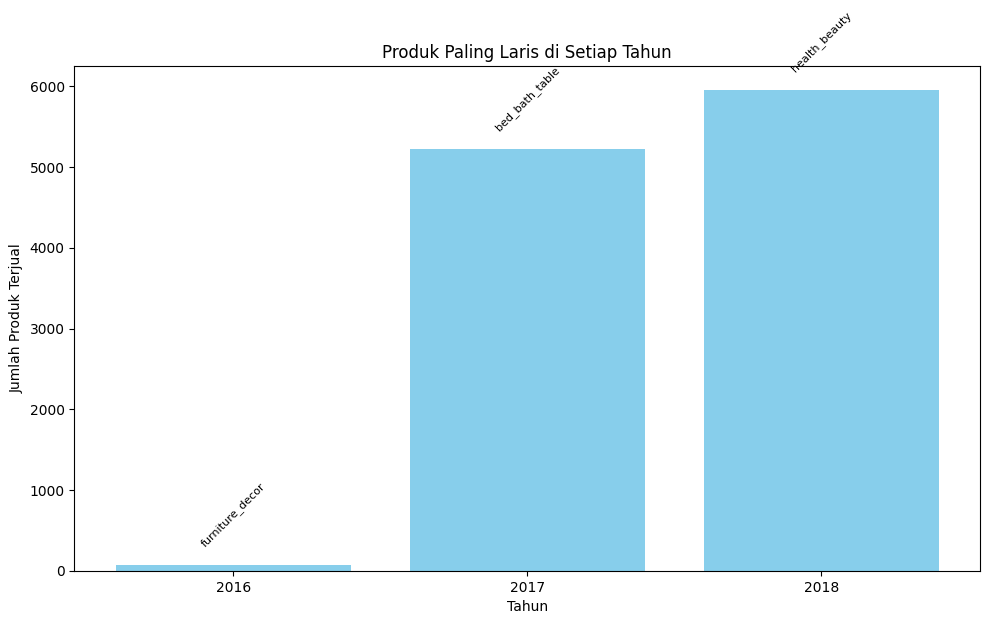

Produk Paling Laris di Setiap Tahun:
Tahun 2016: furniture_decor - 69 produk terjual
Tahun 2017: bed_bath_table - 5223 produk terjual
Tahun 2018: health_beauty - 5951 produk terjual


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mengonversi kolom waktu menjadi datetime untuk analisis musiman
orders_data['order_purchase_year'] = pd.to_datetime(orders_data['order_purchase_timestamp'], errors='coerce').dt.year

# Gabungkan dataset dengan variabel yang benar
merged_data = pd.merge(order_items_data, orders_data[['order_id', 'order_purchase_year']], on='order_id', how='inner')
merged_data = pd.merge(merged_data, products_data[['product_id', 'product_category_name']], on='product_id', how='inner')
merged_data = pd.merge(merged_data, product_category_data, on='product_category_name', how='left')

# Hitung produk paling laris per tahun
top_products_by_year = merged_data.groupby(['order_purchase_year', 'product_category_name_english'])['order_id'].count().reset_index()
top_products_by_year = top_products_by_year.sort_values(['order_purchase_year', 'order_id'], ascending=[True, False])

# Ambil produk paling laris per tahun
top_products_each_year = top_products_by_year.groupby('order_purchase_year').first().reset_index()

# Visualisasi produk paling laris per tahun
plt.figure(figsize=(10, 6))
plt.bar(top_products_each_year['order_purchase_year'].astype(str), top_products_each_year['order_id'], color='skyblue')
plt.xticks(top_products_each_year['order_purchase_year'].astype(str))
plt.xlabel('Tahun')
plt.ylabel('Jumlah Produk Terjual')
plt.title('Produk Paling Laris di Setiap Tahun')
plt.tight_layout()

# Tambahkan label nama produk di atas setiap bar
for i, (year, count, product) in enumerate(zip(top_products_each_year['order_purchase_year'],
                                              top_products_each_year['order_id'],
                                              top_products_each_year['product_category_name_english'])):
    plt.text(i, count + 200, f"{product}", ha='center', va='bottom', fontsize=8, rotation=45)

plt.show()

# Menampilkan hasil produk paling laris per tahun dalam bentuk teks
print("Produk Paling Laris di Setiap Tahun:")
for year, product, count in zip(top_products_each_year['order_purchase_year'],
                                top_products_each_year['product_category_name_english'],
                                top_products_each_year['order_id']):
    print(f"Tahun {year}: {product} - {count} produk terjual")

**Berdasarkan Ulasan**

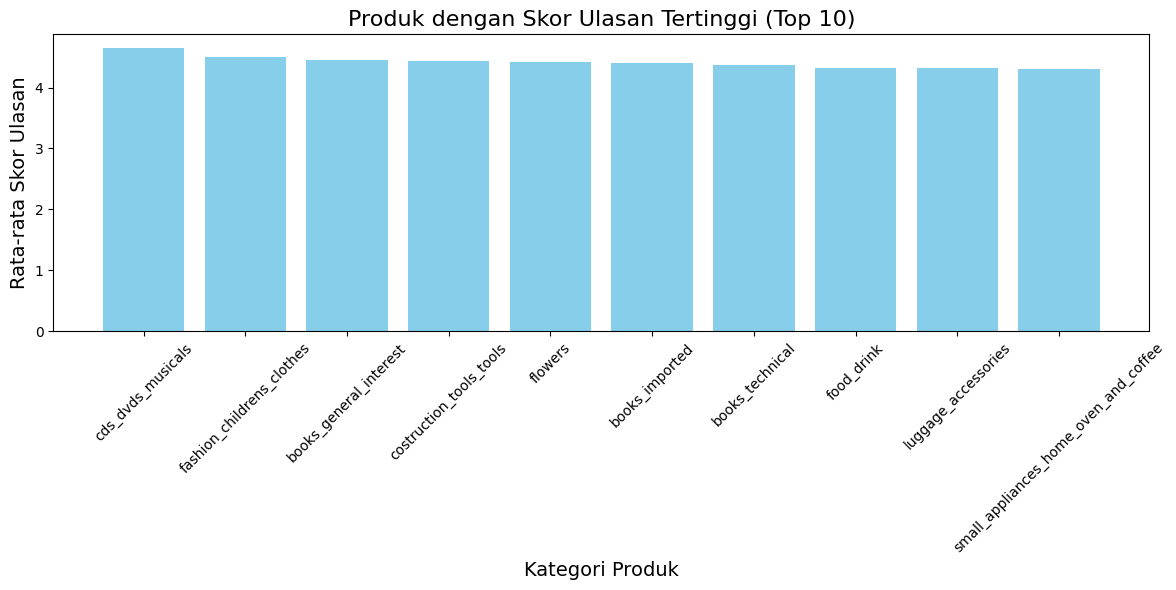

In [ ]:
# Gabungkan data untuk analisis berdasarkan ulasan
reviews_data = pd.read_csv('/content/E-Commerce Public Dataset/order_reviews_dataset.csv')
orders_data = pd.merge(orders_data, customers_df[['customer_id', 'customer_state']], on='customer_id', how='left')
merged_reviews_data = pd.merge(order_items_data, orders_data[['order_id', 'customer_state', 'order_purchase_timestamp']], on='order_id', how='inner')
merged_reviews_data = pd.merge(merged_reviews_data, reviews_data[['order_id', 'review_score']], on='order_id', how='inner')
merged_reviews_data = pd.merge(merged_reviews_data, products_data[['product_id', 'product_category_name']], on='product_id', how='inner')
merged_reviews_data = pd.merge(merged_reviews_data, product_category_data, on='product_category_name', how='left')

# Analisis Produk Terlaris Berdasarkan Ulasan
average_review_by_product = merged_reviews_data.groupby('product_category_name_english')['review_score'].mean().reset_index()
average_review_by_product.columns = ['Kategori Produk', 'Rata-rata Skor Ulasan']
average_review_by_product = average_review_by_product.sort_values(by='Rata-rata Skor Ulasan', ascending=False)

# Visualisasi Produk Terlaris Berdasarkan Ulasan
plt.figure(figsize=(12, 6))
plt.bar(average_review_by_product['Kategori Produk'][:10], average_review_by_product['Rata-rata Skor Ulasan'][:10], color='skyblue')
plt.xticks(rotation=45)
plt.title('Produk dengan Skor Ulasan Tertinggi (Top 10)', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=14)
plt.ylabel('Rata-rata Skor Ulasan', fontsize=14)
plt.tight_layout()
plt.show()

# Menampilkan Tabel Produk Terlaris Berdasarkan Ulasan
print("Produk Terlaris Berdasarkan Ulasan (Top 10):")
print(average_review_by_product.head(10))

**Berdasarkan Lokasi**

Produk Terlaris Berdasarkan Ulasan (Top 10):
                          Kategori Produk  Rata-rata Skor Ulasan
11                      cds_dvds_musicals               4.642857
29              fashion_childrens_clothes               4.500000
8                  books_general_interest               4.446266
22                costruction_tools_tools               4.444444
35                                flowers               4.419355
9                          books_imported               4.400000
10                        books_technical               4.368421
37                             food_drink               4.315412
53                    luggage_accessories               4.315257
64  small_appliances_home_oven_and_coffee               4.302632
                           order_id customer_state
0  e481f51cbdc54678b7cc49136f2d6af7             SP
1  53cdb2fc8bc7dce0b6741e2150273451             BA
2  47770eb9100c2d0c44946d9cf07ec65d             GO
3  949d5b44dbf5de918fe9c16f97b45f8a 

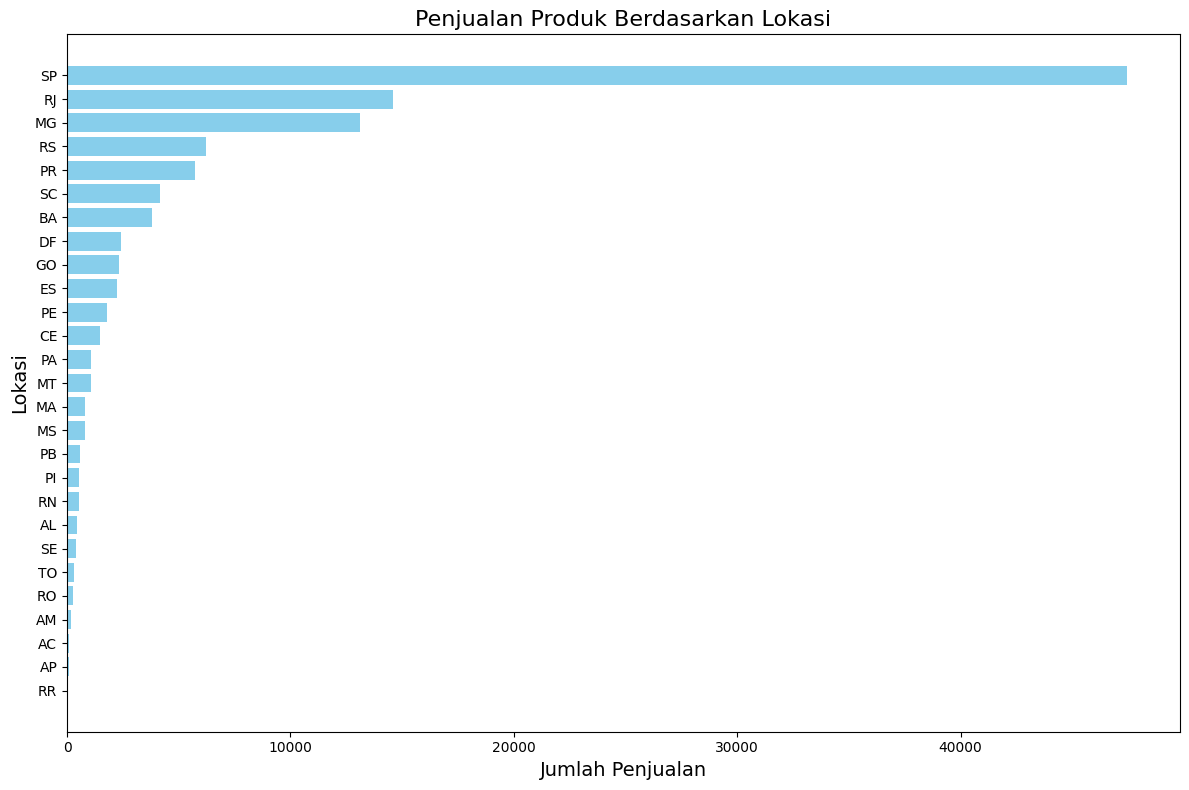

Produk Terlaris Berdasarkan Lokasi:
   Lokasi  Jumlah Penjualan
25     SP             47449
18     RJ             14579
10     MG             13129
22     RS              6235
17     PR              5740
23     SC              4176
4      BA              3799
6      DF              2406
8      GO              2333
7      ES              2256
15     PE              1806
5      CE              1478
13     PA              1080
12     MT              1055
9      MA               824
11     MS               819
14     PB               602
16     PI               542
19     RN               529
1      AL               444
24     SE               385
26     TO               315
20     RO               278
2      AM               165
0      AC                92
3      AP                82
21     RR                52


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Muat dataset
customers_data = pd.read_csv('/content/E-Commerce Public Dataset/customers_dataset.csv')
orders_data = pd.read_csv('/content/E-Commerce Public Dataset/orders_dataset.csv')
order_items_data = pd.read_csv('/content/E-Commerce Public Dataset/order_items_dataset.csv')
products_data = pd.read_csv('/content/E-Commerce Public Dataset/products_dataset.csv')
product_category_data = pd.read_csv('/content/E-Commerce Public Dataset/product_category_name_translation.csv')

# Pastikan tidak ada duplikat pada customer_id di customers_data
customers_data = customers_data.drop_duplicates(subset=['customer_id'])

# Tambahkan kolom customer_state ke orders_data
orders_data = pd.merge(orders_data, customers_data[['customer_id', 'customer_state']], on='customer_id', how='left')

# Verifikasi apakah customer_state sudah ada
print(orders_data[['order_id', 'customer_state']].head())

# Gabungkan data untuk analisis berdasarkan lokasi
location_data = pd.merge(order_items_data, orders_data[['order_id', 'customer_state']], on='order_id', how='inner')
location_data = pd.merge(location_data, products_data[['product_id', 'product_category_name']], on='product_id', how='inner')
location_data = pd.merge(location_data, product_category_data, on='product_category_name', how='left')

# Hitung jumlah penjualan berdasarkan lokasi
sales_by_location = location_data.groupby('customer_state')['order_id'].count().reset_index()
sales_by_location.columns = ['Lokasi', 'Jumlah Penjualan']
sales_by_location = sales_by_location.sort_values(by='Jumlah Penjualan', ascending=False)

# Visualisasi Produk Terlaris Berdasarkan Lokasi
plt.figure(figsize=(12, 8))
plt.barh(sales_by_location['Lokasi'], sales_by_location['Jumlah Penjualan'], color='skyblue')
plt.title('Penjualan Produk Berdasarkan Lokasi', fontsize=16)
plt.xlabel('Jumlah Penjualan', fontsize=14)
plt.ylabel('Lokasi', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Menampilkan Tabel Produk Terlaris Berdasarkan Lokasi
print("Produk Terlaris Berdasarkan Lokasi:")
print(sales_by_location)

### Pertanyaan 2:

**Bagaimana tren pendapatan platform?**

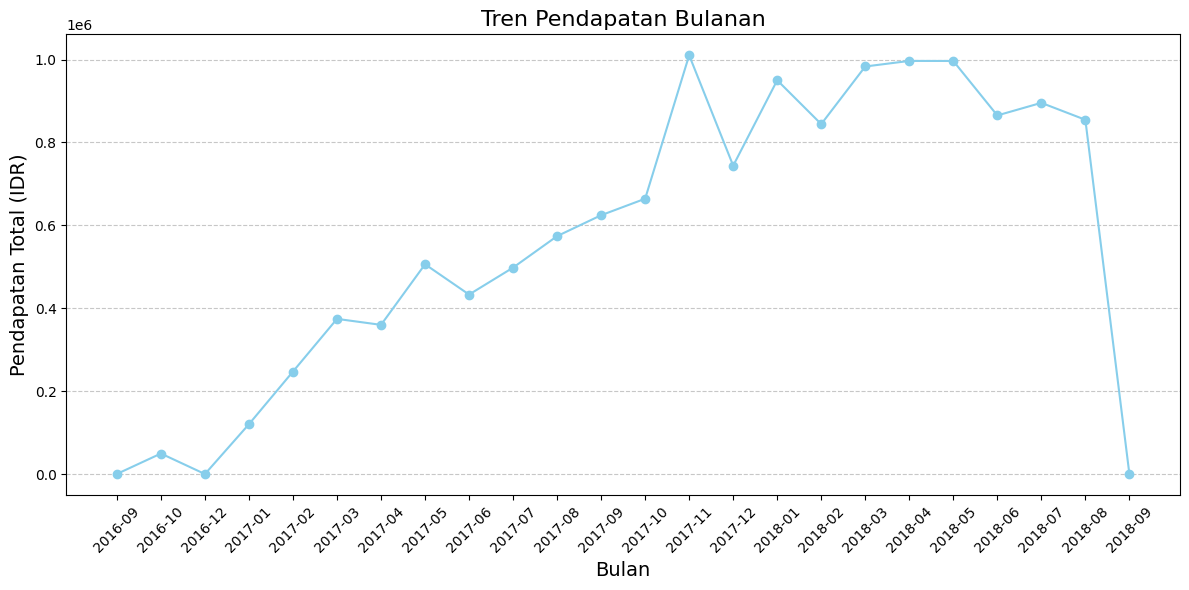

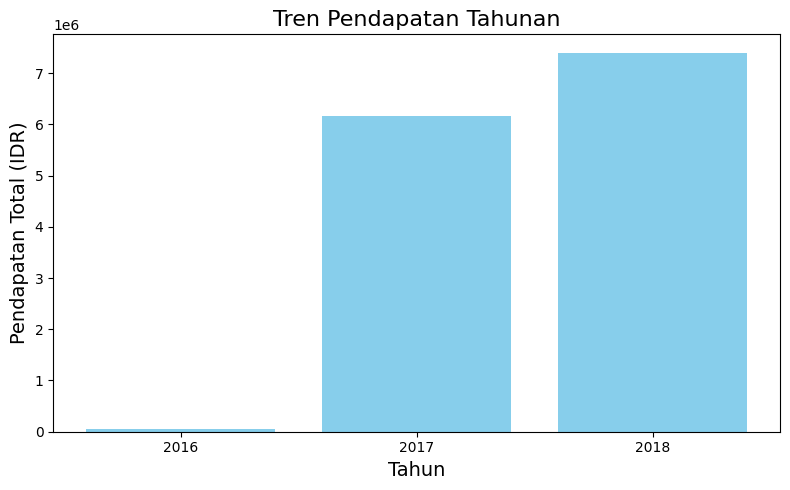

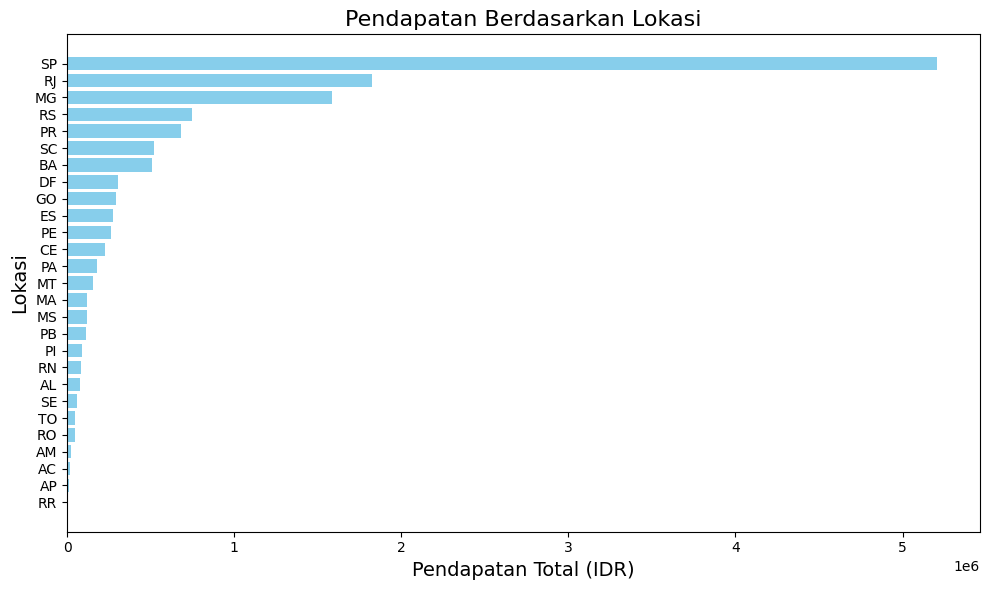

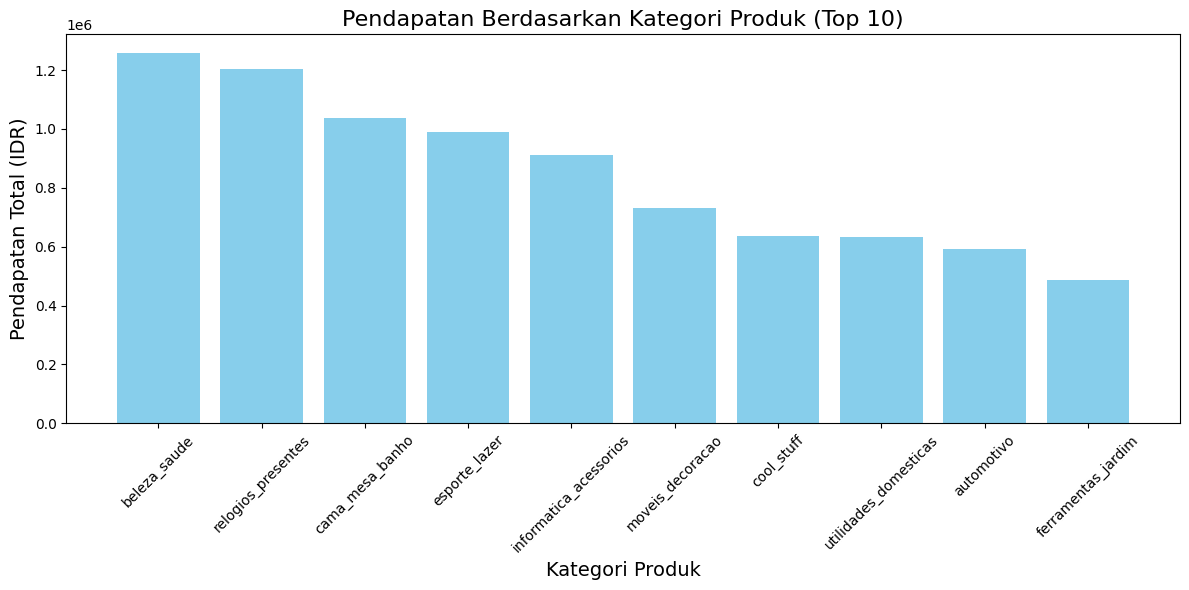

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Muat dataset (pastikan file CSV sudah tersedia di path yang benar)
customers_data = pd.read_csv('/content/E-Commerce Public Dataset/customers_dataset.csv')
orders_data = pd.read_csv('/content/E-Commerce Public Dataset/orders_dataset.csv')
order_items_data = pd.read_csv('/content/E-Commerce Public Dataset/order_items_dataset.csv')
products_data = pd.read_csv('/content/E-Commerce Public Dataset/products_dataset.csv')

# Tambahkan kolom customer_state ke orders_data
orders_data = pd.merge(orders_data, customers_data[['customer_id', 'customer_state']], on='customer_id', how='left')

# Tambahkan kolom pendapatan ke dataset order_items_data
order_items_data['revenue'] = order_items_data['price']

# Gabungkan dengan data pesanan untuk mendapatkan tanggal pembelian
revenue_data = pd.merge(order_items_data, orders_data[['order_id', 'order_purchase_timestamp', 'customer_state']], on='order_id', how='left')
revenue_data = pd.merge(revenue_data, products_data[['product_id', 'product_category_name']], on='product_id', how='left')

# Konversi kolom tanggal pembelian ke datetime
revenue_data['order_purchase_timestamp'] = pd.to_datetime(revenue_data['order_purchase_timestamp'])

# Analisis Pendapatan Total Berdasarkan Periode (Bulanan dan Tahunan)
revenue_data['period_month'] = revenue_data['order_purchase_timestamp'].dt.to_period('M').astype(str)
revenue_data['period_year'] = revenue_data['order_purchase_timestamp'].dt.to_period('Y').astype(str)

# Agregasi pendapatan per bulan
revenue_monthly = revenue_data.groupby('period_month')['revenue'].sum().reset_index()
revenue_monthly.columns = ['Bulan', 'Pendapatan Total']

# Agregasi pendapatan per tahun
revenue_yearly = revenue_data.groupby('period_year')['revenue'].sum().reset_index()
revenue_yearly.columns = ['Tahun', 'Pendapatan Total']

# Visualisasi pendapatan per bulan
plt.figure(figsize=(12, 6))
plt.plot(revenue_monthly['Bulan'], revenue_monthly['Pendapatan Total'], marker='o', linestyle='-', color='skyblue')
plt.xticks(rotation=45)
plt.title('Tren Pendapatan Bulanan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Pendapatan Total (IDR)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualisasi pendapatan per tahun
plt.figure(figsize=(8, 5))
plt.bar(revenue_yearly['Tahun'], revenue_yearly['Pendapatan Total'], color='skyblue')
plt.title('Tren Pendapatan Tahunan', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Pendapatan Total (IDR)', fontsize=14)
plt.tight_layout()
plt.show()

# Analisis Pendapatan Berdasarkan Lokasi
revenue_by_location = revenue_data.groupby('customer_state')['revenue'].sum().reset_index()
revenue_by_location.columns = ['Lokasi', 'Pendapatan Total']
revenue_by_location = revenue_by_location.sort_values(by='Pendapatan Total', ascending=False)

# Visualisasi pendapatan berdasarkan lokasi
plt.figure(figsize=(10, 6))
plt.barh(revenue_by_location['Lokasi'], revenue_by_location['Pendapatan Total'], color='skyblue')
plt.title('Pendapatan Berdasarkan Lokasi', fontsize=16)
plt.xlabel('Pendapatan Total (IDR)', fontsize=14)
plt.ylabel('Lokasi', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Analisis Pendapatan Berdasarkan Kategori Produk
revenue_by_category = revenue_data.groupby('product_category_name')['revenue'].sum().reset_index()
revenue_by_category.columns = ['Kategori Produk', 'Pendapatan Total']
revenue_by_category = revenue_by_category.sort_values(by='Pendapatan Total', ascending=False)

# Visualisasi pendapatan berdasarkan kategori produk
plt.figure(figsize=(12, 6))
plt.bar(revenue_by_category['Kategori Produk'][:10], revenue_by_category['Pendapatan Total'][:10], color='skyblue')
plt.xticks(rotation=45)
plt.title('Pendapatan Berdasarkan Kategori Produk (Top 10)', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=14)
plt.ylabel('Pendapatan Total (IDR)', fontsize=14)
plt.tight_layout()
plt.show()

**Insight:**
- Mengetahui produk paling laris di setiap tahun
- Mengetahui pendapatan dari penjualan produk berdasarkan lokasi, tahun, dan kategori produk

In [ ]:
# customers_df.to_csv("customers_dataset.csv", index=False)
# geolocation_df.to_csv("geolocation_dataset.csv", index=False)
# order_items_df.to_csv("order_items_dataset.csv", index=False)
# order_payments_df.to_csv("order_payments_dataset.csv", index=False)
# order_reviews_df.to_csv("order_reviews_dataset.csv", index=False)
# orders_df.to_csv("orders_dataset.csv", index=False)
# products_df.to_csv("products_dataset.csv", index=False)
# sellers_df.to_csv("sellers_dataset.csv", index=False)

## Conclusion

- Produk paling laris di tahun 2016 adalah furniture decor sebanyak 69 produk terjual, produk paling palis di tahun 2017 adalah bed_bath_table sebanyak 5223 produk terjual, dan produk paling laris di tahun 2018 adalah health_beauty sebanyak 5951 produk terjual.
- Pendapatan bisnis menunjukkan fluktuasi bulanan dengan tren peningkatan tahunan yang stabil, mencerminkan pertumbuhan positif. Beberapa lokasi mendominasi kontribusi pendapatan, sementara kategori produk tertentu menjadi unggulan pasar. Strategi musiman, penguatan di wilayah strategis, dan optimalisasi produk unggulan dapat mendorong performa bisnis lebih baik.